# Basic Plotting with matplotlib

We can show matplotlib figures directly in the notebook by using the `%matplotlib notebook` and `%matplotlib inline` magic commands

In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [3]:
# Let's take a look at the plot function by looking at the docstring

import matplotlib.pyplot as plt
plt.plot?

In [4]:
# args* -> the function supports any number of unnamed arguments
# keyword args* -> the function supports any number of named arguments

<IPython.core.display.Javascript object>


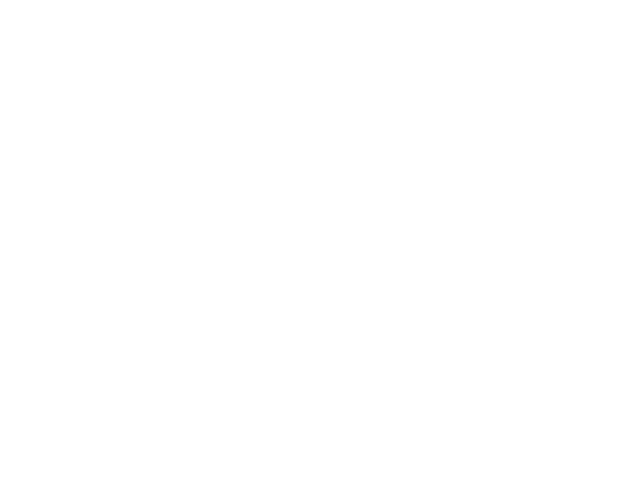

In [5]:
# because the default is the line style '-', nothing will be shown if we only pass in one
# point (3,2)
plt.plot(3, 2)

In [6]:
# The returned value is a line2D object
# We don't see any data points though -> The third argument should be a string which
# signifies how we want that data point to be rendered

In [7]:
# Let's use a period for a dot

# We can pass in '.' to plt.plot to indicate that we want the point (3, 2) to be indicated
# with a market '.'
plt.plot(3, 2, '.')

In [8]:
# The subsequent calls to plot have actually updated our visualization.
# This is a particular feature of this interactive backend, other backends might not.
# The inline magic is not interactive, so subsequent calls create new plots as new cells
# in the notebook

In [9]:
# Directly interfacing with the Artist layer

# We don't have to use the module-level function since we're not calling this form the
# scripting API.

# First, let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# We create a new figure
fig = Figure()

# and associate it with the backend
canvas = FigureCanvasAgg(fig)

# We can add a subplot directly to this.
# 111 means that just want one plot
ax = fig.add_subplot(111)

# plot the point (3, 2)
ax.plot(3, 2, '.')

# Now, the backend that we're using, the one for Jupyter Notebooks, isn't able to render
# this directly, since it expects the scripting layer, pyplot, to have created all of the
# objects.
# So, here we'll save the figure to a png file instead.
canvas.print_png('test.png')

In [10]:
# We do a quick HTML cell magic and execute that to see the rendered image

In [11]:
%%html
<img src = 'test.png' />

In [12]:
# The scripting layer isn't magic, it's jus doing some of the behind the scenes work for
# us.

# For instance, when we make a call to pyplots plt.plot, the scripting layer actually looks
# to see if there's a figure that currently exists, and if not, it creates a new one. It
# then returns the axes for this figure.

# We can actually get access to the figure using the GCF function (Get Current Figure of 
# pyplot) and get access to the axes as well using the GCA function (Get Current Axes).

<IPython.core.display.Javascript object>


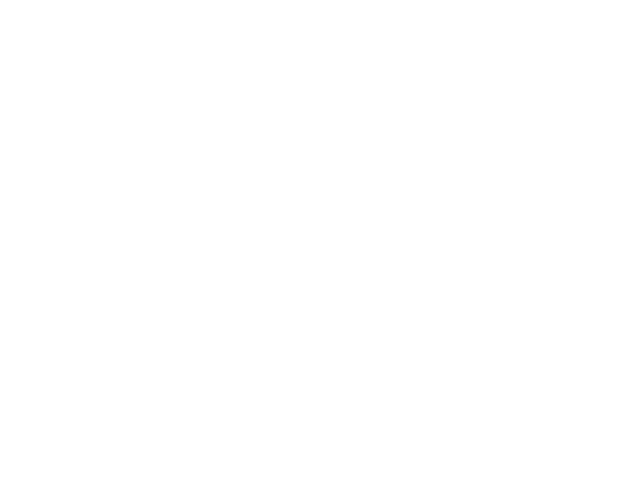

(0.0, 6.0, 0.0, 10.0)

In [13]:
# Let's create a new figure with pyplot
# This means, it won't update our figure at the top of this file

# Create a new figure
plt.figure()

# plot the point (3, 2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0, 6, 0, 10])

<IPython.core.display.Javascript object>


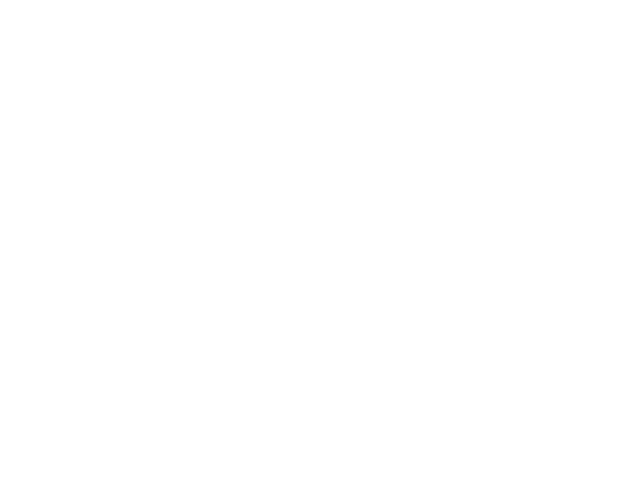

In [14]:
# We can add Artists to an axes object at any time
# Python is doing this for us when we call the plot function. It's determining what shape
# we want from the string, the location associated with that shape, that it's creating a
# patch object and adding that to the axes.

# If we make subsequent calls to the plot function, this will add more data to our chart

# Create a new figure
plt.figure()

# Plot several points using the circle marker
plt.plot(1.5, 1.5, 'o')
plt.plot(2, 2, 'o')
plt.plot(2.5, 2.5, 'o')

In [15]:
# We can see that when this is done, the points are rendered in different colors as the
# axes recognizes them as different data series.

In [16]:
# We can actually get all of the child objects that that axes contains

# Get the current axes
ax = plt.gca()

# Get all the child objects the axes contains
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [17]:
# Line2D objects -> our data points
# Spine -> renderings of the borders of the frame, including tic markers, two axis objects,
#          and a bunch of text which are the labels for the chart
# Rectangle -> background for the axes

## - Scatterplots -

Regardless of the kind of plot, where are several things to keep in mind:
* 1) pyplot is keeping track of the axis objects for us and we can get them when we want
* pyplot is going to retrieve the current figure with the function gcf
* pyplot is going to retrieve the current axis with the function gca

* 2) pyplot just mirrors the API of the axis objects. We can call the plot function against the pyplot module, but this is calling the axis plot funcitons underneath

* 3) The function declaration from most of the functions in matplotlib end with an open set of keyword arguments

<IPython.core.display.Javascript object>


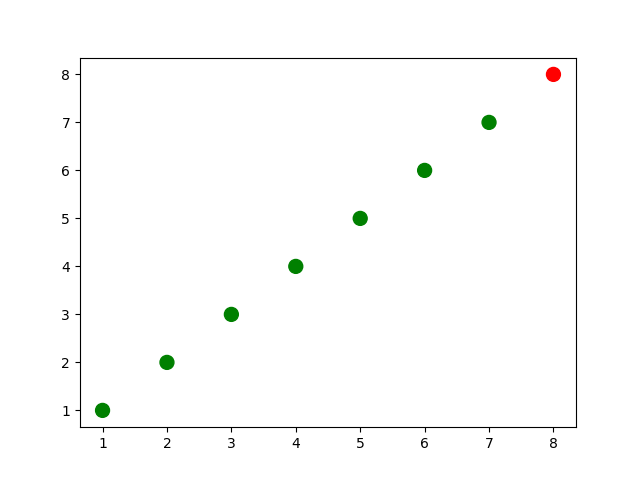

In [39]:
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x

# Create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']

colors = ['green'] * (len(x) - 1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s = 100, c = colors)

In [19]:
# convert the two lists into a list of pairwise tuples

# the zip method takes a number of iterables and creates tuples out of them, matching 
# elements based on index
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])

# zip has lazy evaluation because it's actually a generator in Python 3 which means we need
# to use the list function if w ewant to see the results of iterating over zip
#print(list(zip_generator))
# the above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]


# If we wanted to turn the data back into two lists, one with the x component and one with
# the y component, we can use the parameter 'unpacking' with zip
print(*zip_generator)
# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)

(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


In [20]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# the above prints:
# [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]


[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]


In [21]:
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])

# We can even unpack the results into two variables
x, y = zip(*zip_generator)
print(x)
print(y)
# the above prints:
# (1, 2, 3, 4, 5)
# (6, 7, 8, 9, 10)

(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


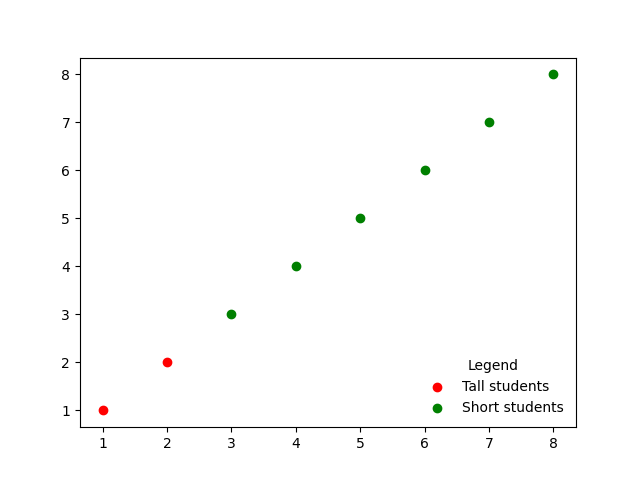

In [40]:
plt.figure()

# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], c = 'red', label = 'Tall students')

# plot a second data series 'Short students' in blue using the last three elements of x
# and y
plt.scatter(x[2:], y[2:], c = 'green', label = 'Short students')

In [23]:
# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')

# add a label to the y axis
plt.ylabel('The grade of the student')

# add a title
plt.title('Relationship between ball kicking and grades')

Text(0.5, 1.0, 'Relationship between ball kicking and grades')

In [24]:
# add a legend (uses the labels from plt.scatter)
plt.legend()

In [42]:
# add the legend to loc = 4 (the lower right hand corner), also gets rid of the frame
# and adds a title
plt.legend(loc = 4, frameon = False, title = 'Legend')

In [26]:
# get children from the current axes (the legend is the second to last item in this list)
plt.gca().get_children()

 Text(0.5, 1.0, 'Relationship between ball kicking and grades'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [27]:
# get the legend form the current axes
legend = plt.gca().get_children()[-2]
legend

In [28]:
# we can use get_children to navigate through the child artists
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [41]:
# The legend itself is an artist, which means it can contain children. Let's take advantage
# of this and write a little routine to recursively go through the list of children in an
# artist


# import the artist class from matplotlib
from matplotlib.artist import Artist

# We make a recursive function which takes in an artist and some depth parameter
def rec_gc(art , depth = 0):
    # Then checks if the object is an artist and if so, prints our its string name
    if isinstance(art, Artist):
        print(' ' * depth + str(art))
        # Then recurses and increases the depth for pretty printing
        for child in art.get_children():
            rec_gc(child, depth + 2)
        
# Finally, we call this on the legend object itself
rec_gc(plt.legend())

Legend
      Text(0, 0, '')
            Text(0, 0, 'Tall students')
            Text(0, 0, 'Short students')
  FancyBboxPatch((0, 0), width=1, height=1)


## - Line Plots -

In [30]:
%matplotlib notebook

In [31]:
import numpy as np

import matplotlib.pyplot as plt

linear_data = np.arange(1, 9, 1, int)
exponential_data = linear_data ** 2

plt.figure()
# plot the linear data and the exponential data
# Both lines will have dots because we used '-o'
plt.plot(linear_data, '-o', exponential_data, '-o')

<IPython.core.display.Javascript object>

In [32]:
# A few new things:

# 1) we only gave y values to our plot -> it realized that we wanted the indexes as the
# x values
# 2) the plot identifies this as two series of data and the colors of the data are different

# Matplotlib created a string based mini languague for commonly used formatting

In [33]:
# For instance, for a dashed line
plt.plot([22, 44, 55], '--r')

In [34]:
# We add a legend too

# Since we didn't label the data points, we need to create the legend entries when adding
# the legend itself
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
plt.legend(['Baseline', 'Competition', 'Us'])

In [35]:
# We will fill the area between the linear data and the exponential data

# We'll just use the same range of data points it's already using
# Then we put in lower and upper bounds
# Color of the area
# Transparency
plt.gca().fill_between(range(len(linear_data)),
                      linear_data, exponential_data,
                      facecolor = 'blue',
                      alpha = 0.25)

In [36]:
# Using datetime data as x axis

# Let's create a new image
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype = 'datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',
        observation_dates, exponential_data, '-o')

<IPython.core.display.Javascript object>

In [37]:
# Using pandas libraries for dates will be better

import pandas as pd

# we create a new image
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype = 'datetime64[D]')
observation_dates = map(pd.to_datetime, observation_dates)
plt.plot(observation_dates, linear_data, '-o',
        observation_dates, exponential_data, '-o')

<IPython.core.display.Javascript object>

RuntimeError: matplotlib does not support generators as input

In [ ]:
# The problem is the map function returns an iterator. Matplotlib can't handle the 
# iterator, so we need to convert it to a list first.

plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype = 'datetime64[D]')

# We can convert the map into a list, although this isn't a very memory-efficient way
# of handling the data
observation_dates = list(map(pd.to_datetime, observation_dates))
plt.plot(observation_dates, linear_data, '-o',
        observation_dates, exponential_data, '-o')

In [ ]:
# The dates are overlapped

# We can access te text of the tics using the get tick labels function
x = plt.gca().xaxis

# Each of the tick labels are a text object which itself is an artist. This means that we
# can use a number of different artist functions
for item in x.get_ticklabels():
    # One specific to text is the set rotation function which changes the rotation based
    # on degrees
    item.set_rotation(45)

In [ ]:
# Now the text runs off the image, so we need to adjust that
plt.subplots_adjust(bottom = 0.25)

In [ ]:
# Matplotlib has a fairly strong connection to LaTeX, a type setting language used by
# mathematicians and scientists.
# This means, we can use a subset of LaTeX directly in the labels and matplotlib will render
# them as equations

ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Quadratic vs. Linear Performance')

In [ ]:
ax.set_title('Quadratic ($x^2$) vs. Linear ($x$) performance')

## - Bar Charts -

In [ ]:
# We are going to create a list of values as long as our linear data
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)   # width of the bars

In [ ]:
# To add a second bar, we simply call the bar plot again with new data.
# We need to adjust the x component to make up for the first bar we plotted

new_xvals = []
for item in xvals:
    new_xvals.append(item + 0.3)
    
# values of xvals = [0.3, 1.3, 2.3, 3.3, 4.3, 5.3, 6.3, 7.3]
# We are just adding 0.3 to the x's so that the graph starts 0.3 to the right
    
plt.bar(new_xvals, exponential_data, width = 0.3, color = 'red')

In [ ]:
# All of the x labels are to the far left of the items being described, and not centered.
# We can center this but we'd have to manually calculate the centers

In [ ]:
# We can add error bars to each bar as well

# For instance, each of our pieces of data in the linear data might actually be a mean value,
# computed from many different observations. So, we could just create a list of error values.
from random import randint

# Return a random integer between 0 and 15 for each x in the range of the length of the data
linear_err = [randint(0, 15) for x in range(len(linear_data))]
plt.bar(xvals, linear_data, width = 0.3, yerr = linear_err)

In [ ]:
# Stacked bar charts

# We can do this by setting the bottom parameter and our second plot to be equal to first
# set of data to plot
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color = 'b')
plt.bar(xvals, exponential_data, width = 0.3, bottom = linear_data, color = 'r')

In [ ]:
# Horizontal graph

plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color = 'b')
plt.barh(xvals, exponential_data, height = 0.3, left = linear_data, color = 'r')

## - Dejunkifying a Plot -

<IPython.core.display.Javascript object>


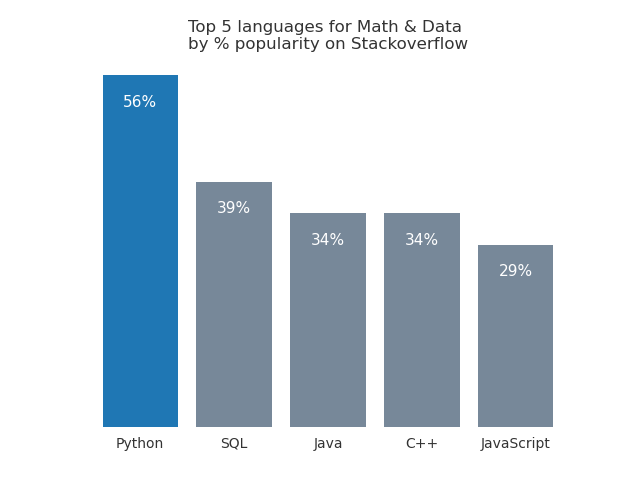

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align = 'center', linewidth = 0, color = 'lightslategrey')

# make the python bar a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha = 0.8)
# remove the Y label since bars are directly labeled
# plt.ylabel('% Popularity', alpha = 0.8)
plt.title('Top 5 languages for Math & Data \nby % popularity on Stackoverflow', alpha = 0.8)

# remove all ticks (both axes) and tick labels on the Y axis
plt.tick_params(top = False, bottom = False, left = False, right = False,
                labelleft = False, labelbottom = True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    # plt.text(positionx, positiony, text, horizontal alignment, color, fontsize)
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5,
                  str(int(bar.get_height())) + '%', ha = 'center', color = 'w',
                   fontsize = 11)

plt.show()

In [ ]:
x = plt.gca().xaxis

for item in x.get_ticklabels():
    x.drop(item)